In [ ]:
!pip install pmdarima

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
train = pd.read_csv("train_final.csv", index_col=['date'], parse_dates=['date'])
test = pd.read_csv("test_final.csv", index_col=['date'], parse_dates=['date'])

In [6]:
train = train[~(train.index < '2020-03-01')]
test = test[~(test.index < '2020-03-01')]

In [7]:
# build the model with one country with highest GDP per capita in each continent
# if data of multiple regions are available, use one region
# then apply the model to other countries in same continent
Luxembourg_train = train.loc[train.country_code == 'LU','new_confirmed'] # Europe
Singapore_train = train.loc[train.country_code == 'SG','new_confirmed'] # Asia
US_train = train.loc[train.location_key_x == 'US_AK','new_confirmed'] # North America
Australia_train = train.loc[train.location_key_x == 'AU_NT','new_confirmed'] # Oceania
Luxembourg_test = test.loc[test.country_code == 'LU','new_confirmed']
Singapore_test = test.loc[test.country_code == 'SG','new_confirmed']
US_test = test.loc[test.location_key_x == 'US_AK','new_confirmed']
Australia_test = test.loc[test.location_key_x == 'AU_NT','new_confirmed']

In [8]:
Luxembourg_model = auto_arima(Luxembourg_train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=15,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(Luxembourg_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[15]             : AIC=inf, Time=6.57 sec
 ARIMA(0,1,0)(0,1,0)[15]             : AIC=8158.259, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[15]             : AIC=8045.764, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[15]             : AIC=inf, Time=1.94 sec
 ARIMA(1,1,0)(0,1,0)[15]             : AIC=8132.953, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[15]             : AIC=7922.302, Time=2.20 sec
 ARIMA(1,1,0)(2,1,1)[15]             : AIC=inf, Time=9.35 sec
 ARIMA(1,1,0)(1,1,1)[15]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(2,1,0)[15]             : AIC=7924.259, Time=1.55 sec
 ARIMA(2,1,0)(2,1,0)[15]             : AIC=7781.830, Time=3.10 sec
 ARIMA(2,1,0)(1,1,0)[15]             : AIC=7834.402, Time=0.83 sec
 ARIMA(2,1,0)(2,1,1)[15]             : AIC=inf, Time=9.43 sec
 ARIMA(2,1,0)(1,1,1)[15]             : AIC=inf, Time=2.50 sec
 ARIMA(3,1,0)(2,1,0)[15]             : AIC=7782.611, Time=3.60 sec
 ARIMA(2,1,1)(2,1,0)[15]             : AIC=7720.6

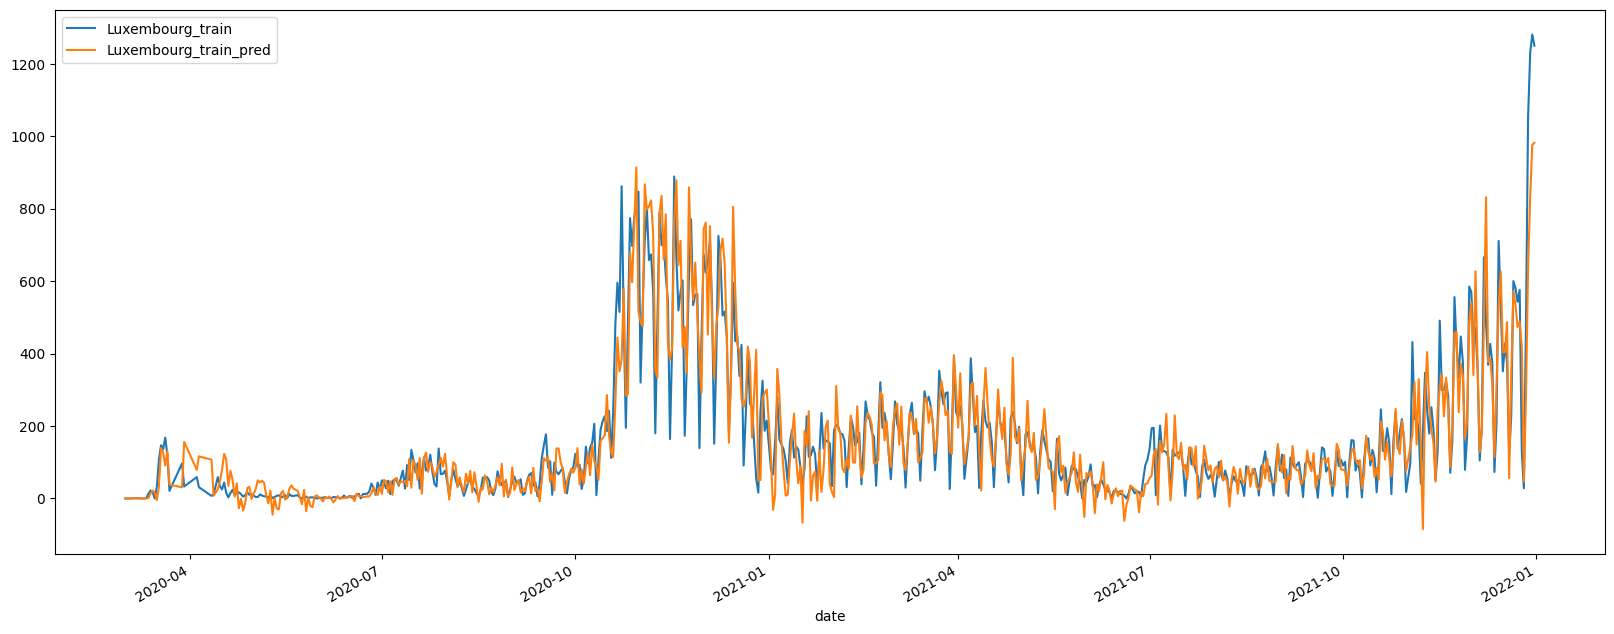

In [20]:
Luxembourg_train_pred=Luxembourg_model.fittedvalues()
pd.concat([Luxembourg_train, Luxembourg_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['Luxembourg_train', 'Luxembourg_train_pred'])

In [23]:
np.sqrt(mean_squared_error(Luxembourg_train, Luxembourg_train_pred))

80.72167090780579

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


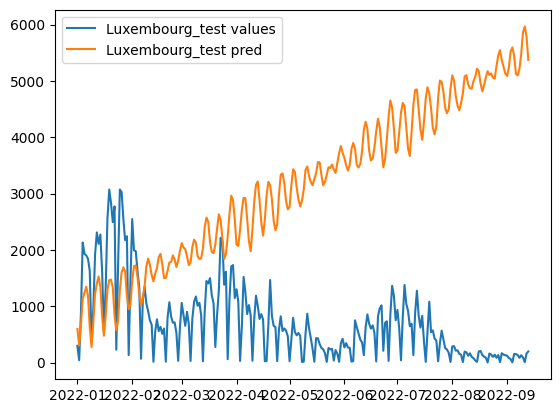

In [21]:
start = '2022-01-01'
end = '2022-09-13'
date_range = pd.date_range(start=start, end=end)
Luxembourg_test_pred = Luxembourg_model.predict(n_periods=len(Luxembourg_test))
Luxembourg_test_pred_df = pd.DataFrame({'date': date_range, 'predicted_value': Luxembourg_test_pred})
Luxembourg_test_pred_df = Luxembourg_test_pred_df.set_index('date')
plt.plot(Luxembourg_test)
plt.plot(Luxembourg_test_pred_df)
plt.legend(['Luxembourg_test values', 'Luxembourg_test pred'])

In [22]:
# Luxembourg test rmse
np.sqrt(mean_squared_error(Luxembourg_test, Luxembourg_test_pred))

3084.2846670332847

In [17]:
Singapore_model = auto_arima(Singapore_train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=15,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(Singapore_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[15]             : AIC=inf, Time=2.04 sec
 ARIMA(0,1,0)(0,1,0)[15]             : AIC=9421.995, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[15]             : AIC=9197.447, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[15]             : AIC=inf, Time=1.68 sec
 ARIMA(1,1,0)(0,1,0)[15]             : AIC=9251.114, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[15]             : AIC=9040.395, Time=2.50 sec
 ARIMA(1,1,0)(2,1,1)[15]             : AIC=inf, Time=10.99 sec
 ARIMA(1,1,0)(1,1,1)[15]             : AIC=inf, Time=1.75 sec
 ARIMA(0,1,0)(2,1,0)[15]             : AIC=9160.511, Time=1.61 sec
 ARIMA(2,1,0)(2,1,0)[15]             : AIC=9016.163, Time=2.80 sec
 ARIMA(2,1,0)(1,1,0)[15]             : AIC=9155.471, Time=0.77 sec
 ARIMA(2,1,0)(2,1,1)[15]             : AIC=inf, Time=12.80 sec
 ARIMA(2,1,0)(1,1,1)[15]             : AIC=inf, Time=3.38 sec
 ARIMA(3,1,0)(2,1,0)[15]             : AIC=9004.544, Time=3.61 sec
 ARIMA(3,1,0)(1,1,0)[15]             : AIC=9134

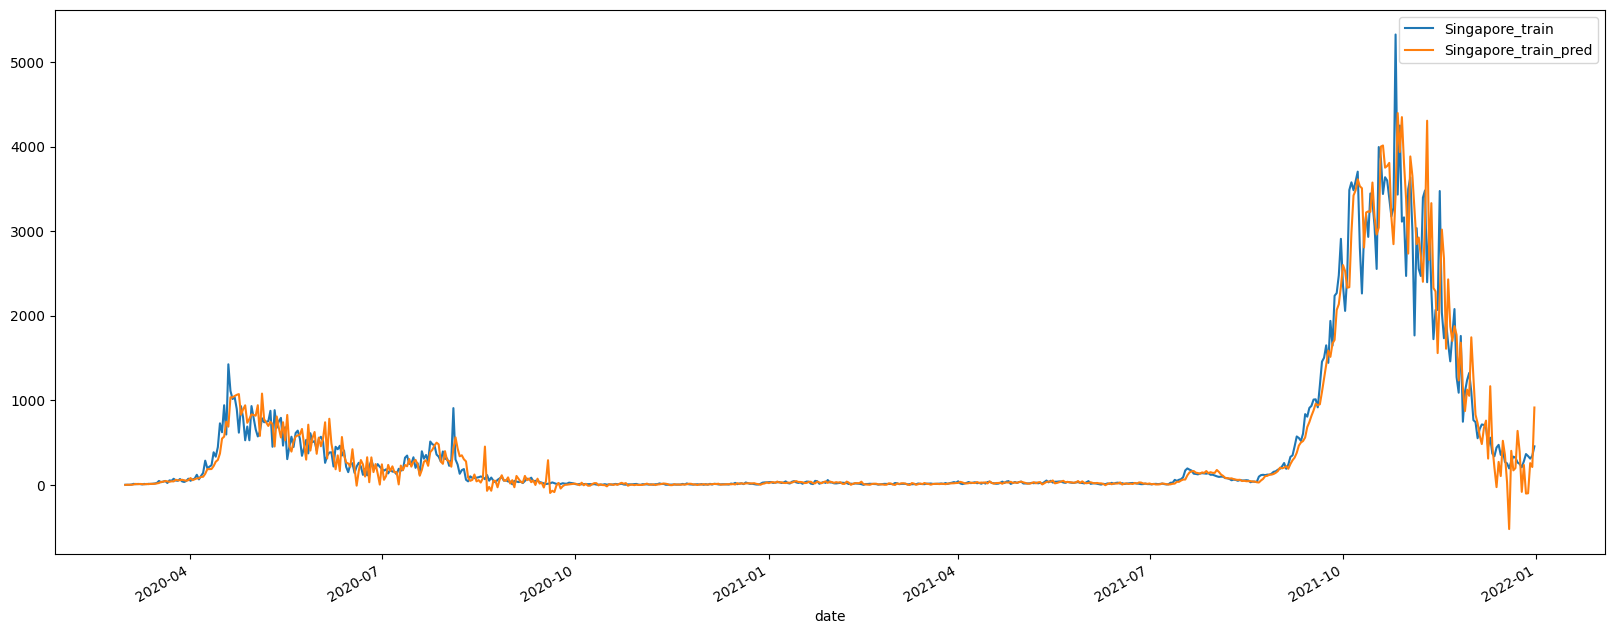

In [24]:
Singapore_train_pred=Singapore_model.fittedvalues()
pd.concat([Singapore_train, Singapore_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['Singapore_train', 'Singapore_train_pred'])

In [25]:
# Singapore train rmse
np.sqrt(mean_squared_error(Singapore_train, Singapore_train_pred))

238.87439778871965

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


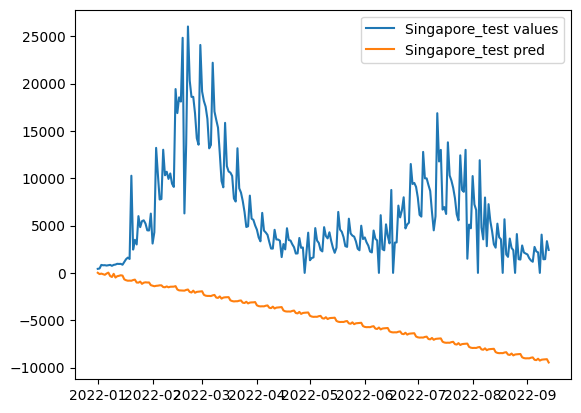

In [26]:
start = '2022-01-01'
end = '2022-09-13'
date_range = pd.date_range(start=start, end=end)
Singapore_test_pred = Singapore_model.predict(n_periods=len(Singapore_test))
Singapore_test_pred_df = pd.DataFrame({'date': date_range, 'predicted_value': Singapore_test_pred})
Singapore_test_pred_df = Singapore_test_pred_df.set_index('date')
plt.plot(Singapore_test)
plt.plot(Singapore_test_pred_df)
plt.legend(['Singapore_test values', 'Singapore_test pred'])

In [28]:
# Singapore test rmse
np.sqrt(mean_squared_error(Singapore_test, Singapore_test_pred))

12092.45144096337

In [29]:
US_model = auto_arima(US_train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=15,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(US_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[15]             : AIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(0,1,0)[15]             : AIC=8552.866, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[15]             : AIC=8330.584, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[15]             : AIC=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,1,0)[15]             : AIC=8449.819, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[15]             : AIC=8292.640, Time=2.28 sec
 ARIMA(1,1,0)(2,1,1)[15]             : AIC=inf, Time=9.96 sec
 ARIMA(1,1,0)(1,1,1)[15]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(2,1,0)[15]             : AIC=8333.710, Time=1.41 sec
 ARIMA(2,1,0)(2,1,0)[15]             : AIC=8242.886, Time=2.80 sec
 ARIMA(2,1,0)(1,1,0)[15]             : AIC=8270.547, Time=1.22 sec
 ARIMA(2,1,0)(2,1,1)[15]             : AIC=inf, Time=10.12 sec
 ARIMA(2,1,0)(1,1,1)[15]             : AIC=inf, Time=4.55 sec
 ARIMA(3,1,0)(2,1,0)[15]             : AIC=8232.685, Time=3.05 sec
 ARIMA(3,1,0)(1,1,0)[15]             : AIC=8261.

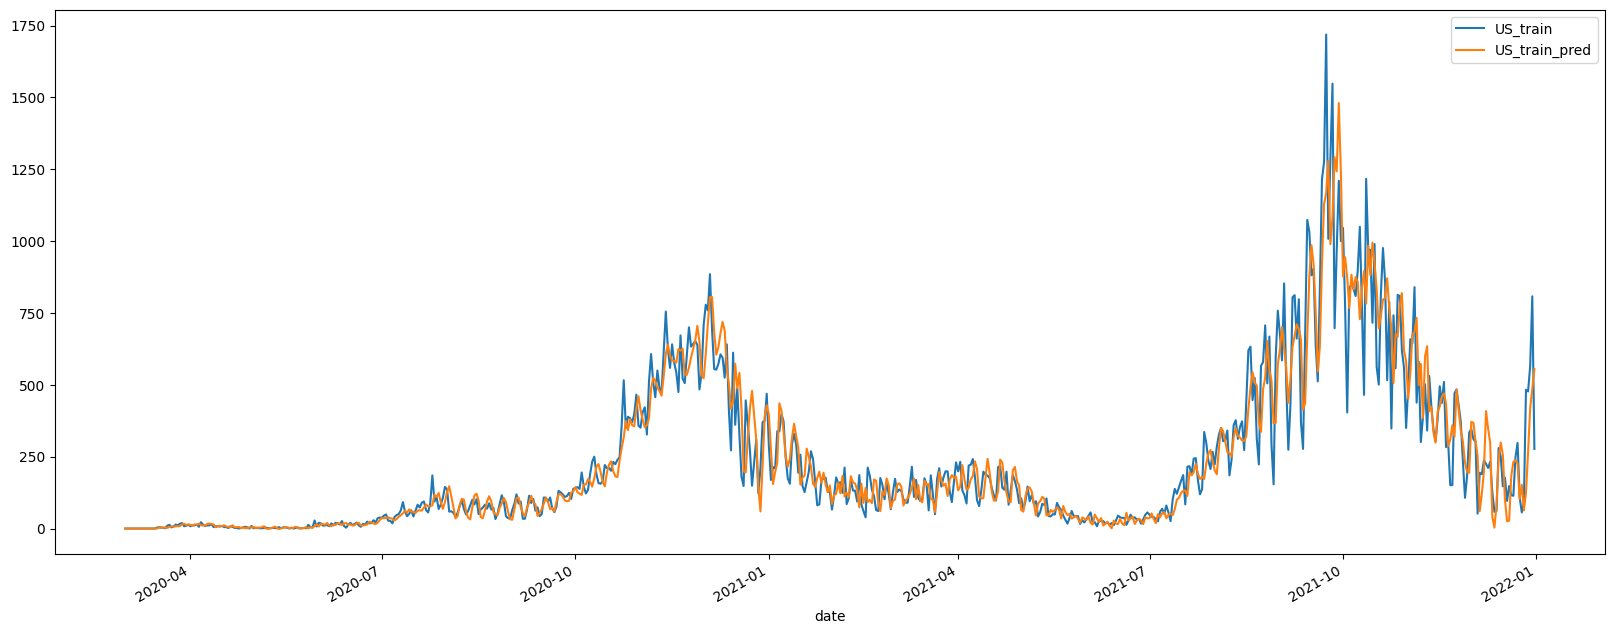

In [30]:
US_train_pred=US_model.fittedvalues()
pd.concat([US_train, US_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['US_train', 'US_train_pred'])

In [31]:
# US train rmse
np.sqrt(mean_squared_error(US_train, US_train_pred))

98.03405217341188

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


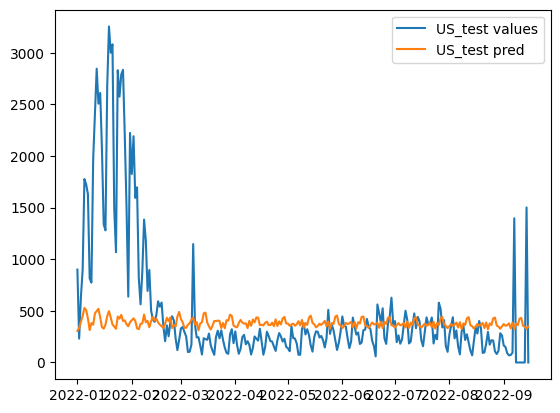

In [35]:
start = '2022-01-01'
end = '2022-09-15'
date_range = pd.date_range(start=start, end=end)
US_test_pred = US_model.predict(n_periods=len(US_test))
US_test_pred_df = pd.DataFrame({'date': date_range, 'predicted_value': US_test_pred})
US_test_pred_df = US_test_pred_df.set_index('date')
plt.plot(US_test)
plt.plot(US_test_pred_df)
plt.legend(['US_test values', 'US_test pred'])

In [36]:
# US test rmse
np.sqrt(mean_squared_error(US_test, US_test_pred))

652.7403703298035

In [37]:
Australia_model = auto_arima(Australia_train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=15,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(Australia_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[15]             : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[15]             : AIC=3204.353, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[15]             : AIC=3071.092, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[15]             : AIC=inf, Time=1.00 sec
 ARIMA(1,1,0)(0,1,0)[15]             : AIC=3175.701, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[15]             : AIC=2997.037, Time=1.19 sec
 ARIMA(1,1,0)(2,1,1)[15]             : AIC=inf, Time=5.29 sec
 ARIMA(1,1,0)(1,1,1)[15]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(2,1,0)[15]             : AIC=3017.046, Time=0.73 sec
 ARIMA(2,1,0)(2,1,0)[15]             : AIC=2996.731, Time=1.35 sec
 ARIMA(2,1,0)(1,1,0)[15]             : AIC=3070.335, Time=0.57 sec
 ARIMA(2,1,0)(2,1,1)[15]             : AIC=inf, Time=5.44 sec
 ARIMA(2,1,0)(1,1,1)[15]             : AIC=inf, Time=1.75 sec
 ARIMA(3,1,0)(2,1,0)[15]             : AIC=2978.558, Time=1.69 sec
 ARIMA(3,1,0)(1,1,0)[15]             : AIC=3048.9

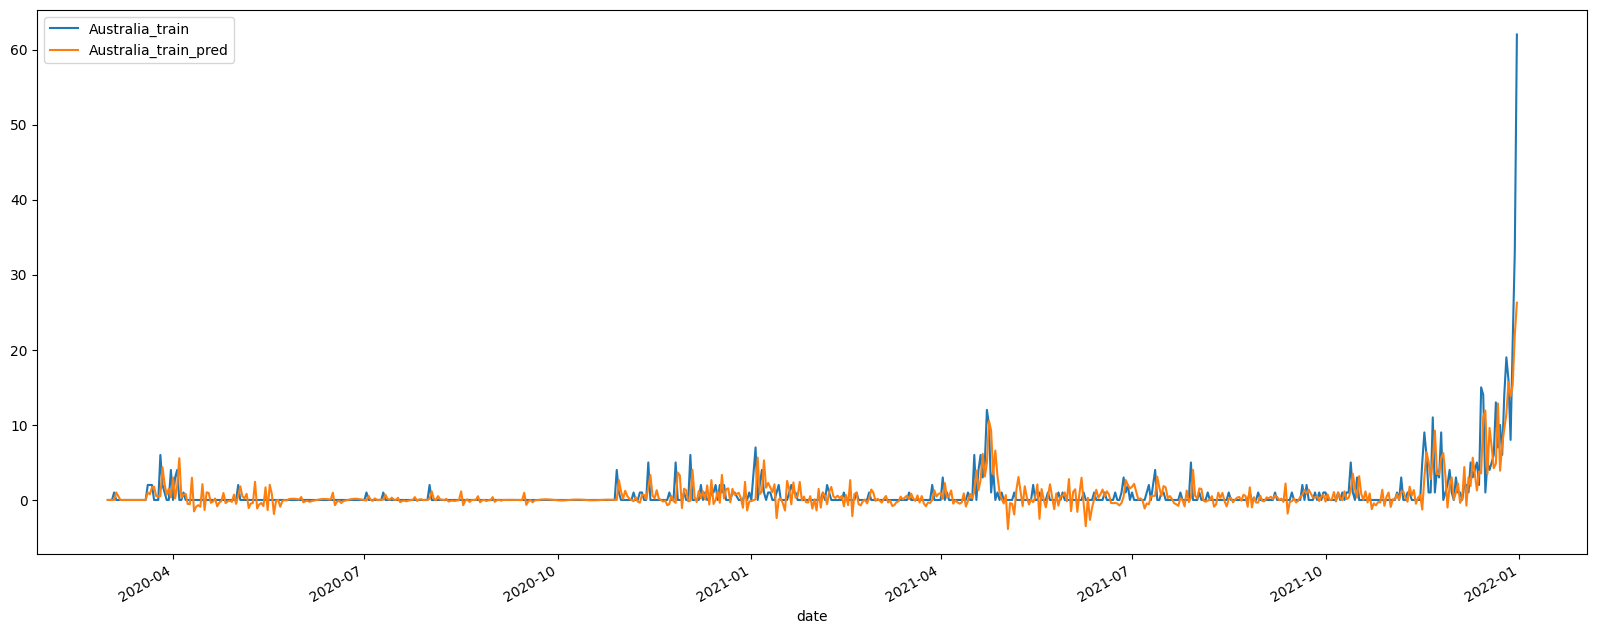

In [38]:
Australia_train_pred=Australia_model.fittedvalues()
pd.concat([Australia_train, Australia_train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['Australia_train', 'Australia_train_pred'])

In [39]:
# Australia train rmse
np.sqrt(mean_squared_error(Australia_train, Australia_train_pred))

2.2970964943498595

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


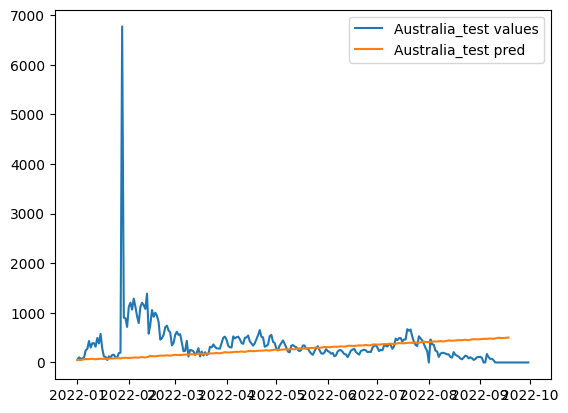

In [46]:
start = '2022-01-01'
end = '2022-09-18'
date_range = pd.date_range(start=start, end=end)
Australia_test_pred = Australia_model.predict(n_periods=len(Australia_test))
Australia_test_pred_df = pd.DataFrame({'date': date_range, 'predicted_value': Australia_test_pred})
Australia_test_pred_df = Australia_test_pred_df.set_index('date')
plt.plot(Australia_test)
plt.plot(Australia_test_pred_df)
plt.legend(['Australia_test values', 'Australia_test pred'])

In [47]:
# Singapore test rmse
np.sqrt(mean_squared_error(Australia_test, Australia_test_pred))

541.5067245720608

In [48]:
# apply to all countries
# Luxembourg_model for European countries
# Singapore_model for Asian countries
# US_model for countries in North America - only US in top 10
# Australia_model for Oceania countries - only Australia in top 10
Ireland_train = train.loc[train.country_code == 'IE','new_confirmed'] # Europe
Qatar_train = train.loc[train.country_code == 'QA','new_confirmed'] # Asia
Iceland_train = train.loc[train.country_code == 'IS','new_confirmed'] # Europe
Denmark_train = train.loc[train.country_code == 'DK','new_confirmed'] # Europe

Ireland_test = test.loc[test.country_code == 'IE','new_confirmed'] # Europe
Qatar_test = test.loc[test.country_code == 'QA','new_confirmed'] # Asia
Iceland_test = test.loc[test.country_code == 'IS','new_confirmed'] # Europe
Denmark_test = test.loc[test.country_code == 'DK','new_confirmed'] # Europe

In [54]:
# Ireland using Luxembourg model
train_start = '2020-03-01'
train_end = '2021-12-26'
train_date_range = pd.date_range(start=train_start, end=train_end)
Ireland_train_pred = Luxembourg_model.predict(n_periods=len(Ireland_train))
Ireland_train_pred_df = pd.DataFrame({'date': train_date_range, 'predicted_value': Ireland_train_pred})
Ireland_train_pred_df = Ireland_train_pred_df.set_index('date')

test_start = '2022-01-01'
test_end = '2022-09-13'
test_date_range = pd.date_range(start=test_start, end=test_end)
Ireland_test_pred = Luxembourg_model.predict(n_periods=len(Ireland_test))
Ireland_test_pred_df = pd.DataFrame({'date': test_date_range, 'predicted_value': Ireland_test_pred})
Ireland_test_pred_df = Ireland_test_pred_df.set_index('date')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
# Ireland training rmse
np.sqrt(mean_squared_error(Ireland_train,Ireland_train_pred_df))

6553.320857770652

In [57]:
# Ireland test rmse
np.sqrt(mean_squared_error(Ireland_test,Ireland_test_pred_df))

5635.774508333234

In [66]:
# Qatar using Singapore model
train_start = '2020-03-01'
train_end = '2021-12-30'
train_date_range = pd.date_range(start=train_start, end=train_end)
Qatar_train_pred = Luxembourg_model.predict(n_periods=len(Qatar_train))
Qatar_train_pred_df = pd.DataFrame({'date': train_date_range, 'predicted_value': Qatar_train_pred})
Qatar_train_pred_df = Qatar_train_pred_df.set_index('date')

test_start = '2022-01-01'
test_end = '2022-09-13'
test_date_range = pd.date_range(start=test_start, end=test_end)
Qatar_test_pred = Luxembourg_model.predict(n_periods=len(Qatar_test))
Qatar_test_pred_df = pd.DataFrame({'date': test_date_range, 'predicted_value': Qatar_test_pred})
Qatar_test_pred_df = Qatar_test_pred_df.set_index('date')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [67]:
# Qatar training rmse
np.sqrt(mean_squared_error(Qatar_train,Qatar_train_pred_df))

7643.171373754223

In [68]:
# Qatar test rmse
np.sqrt(mean_squared_error(Qatar_test,Qatar_test_pred_df))

3111.9714906520576

In [73]:
# Iceland using Luxembourg model
train_start = '2020-03-01'
train_end = '2021-12-31'
train_date_range = pd.date_range(start=train_start, end=train_end)
Iceland_train_pred = Luxembourg_model.predict(n_periods=len(Iceland_train))
Iceland_train_pred_df = pd.DataFrame({'date': train_date_range, 'predicted_value': Iceland_train_pred})
Iceland_train_pred_df = Iceland_train_pred_df.set_index('date')

test_start = '2022-01-01'
test_end = '2022-09-13'
test_date_range = pd.date_range(start=test_start, end=test_end)
Iceland_test_pred = Luxembourg_model.predict(n_periods=len(Iceland_test))
Iceland_test_pred_df = pd.DataFrame({'date': test_date_range, 'predicted_value': Iceland_test_pred})
Iceland_test_pred_df = Iceland_test_pred_df.set_index('date')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [74]:
# Iceland training rmse
np.sqrt(mean_squared_error(Iceland_train,Iceland_train_pred_df))

7847.620421951861

In [75]:
# Iceland test rmse
np.sqrt(mean_squared_error(Iceland_test,Iceland_test_pred_df))

3251.260355712905

In [77]:
# Denmark using Luxembourg model
train_start = '2020-03-01'
train_end = '2021-12-13'
train_date_range = pd.date_range(start=train_start, end=train_end)
Denmark_train_pred = Luxembourg_model.predict(n_periods=len(Denmark_train))
Denmark_train_pred_df = pd.DataFrame({'date': train_date_range, 'predicted_value': Denmark_train_pred})
Denmark_train_pred_df = Denmark_train_pred_df.set_index('date')

test_start = '2022-01-01'
test_end = '2022-09-13'
test_date_range = pd.date_range(start=test_start, end=test_end)
Denmark_test_pred = Luxembourg_model.predict(n_periods=len(Denmark_test))
Denmark_test_pred_df = pd.DataFrame({'date': test_date_range, 'predicted_value': Denmark_test_pred})
Denmark_test_pred_df = Denmark_test_pred_df.set_index('date')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [78]:
# Denmark training rmse
np.sqrt(mean_squared_error(Denmark_train,Denmark_train_pred_df))

6504.023273351719

In [79]:
# Denmark test rmse
np.sqrt(mean_squared_error(Denmark_test,Denmark_test_pred_df))

16789.221085445337